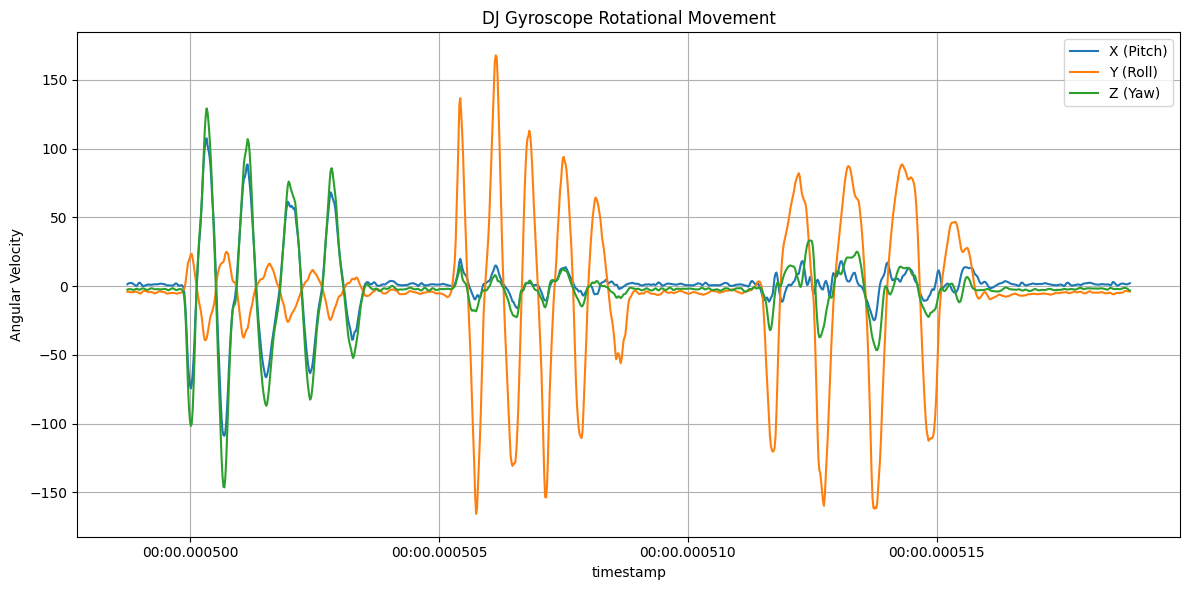

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dj_gyro_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['x'], label='X (Pitch)')
plt.plot(df['timestamp'], df['y'], label='Y (Roll)')
plt.plot(df['timestamp'], df['z'], label='Z (Yaw)')
plt.title('DJ Gyroscope Rotational Movement')
plt.xlabel('timestamp')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
from PIL import Image, ImageSequence
from sklearn.preprocessing import MinMaxScaler

# Load gyroscope CSV data
df = pd.read_csv("dj_gyro_data.csv")

# Normalize gyro values to 0–255 RGB scale
scaler = MinMaxScaler((0, 255))
gyro_scaled = scaler.fit_transform(df[['x', 'y', 'z']])
gyro_scaled = np.clip(gyro_scaled, 0, 255).astype(np.uint8)

# GIF settings
frame_height = 100
frame_width = 100
bar_width = 10
duration = 30  # ms per frame

frames = []

for i, (r, g, b) in enumerate(gyro_scaled):
    frame = Image.new("RGB", (frame_width, frame_height), (0, 0, 0))
    
    # Create vertical color bar from gyro reading
    color_bar = Image.new("RGB", (bar_width, frame_height), (r, g, b))
    frame.paste(color_bar, (frame_width - bar_width, 0))  # paste on the right
    
    # Shift previous content left by bar_width
    if i > 0:
        prev = frames[-1].copy()
        frame.paste(prev.crop((bar_width, 0, frame_width, frame_height)), (0, 0))

    frames.append(frame)

# Save as animated GIF
frames[0].save("dj_gyro_motion.gif", save_all=True, append_images=frames[1:], loop=0, duration=duration)
print("Saved animated GIF: dj_gyro_motion.gif")

Saved animated GIF: dj_gyro_motion.gif
